## Stochastic Calculus

### 1. Brownian Motion의 개념

W(t)는 브라운운동이며 시간에 따라 랜덤넘버가 달라지는 "확률과정(Stochastic Process)"이다. 

다음과 같은 성질을 가진다.

$ i) \ \ W(0) = 0 $

$ ii) \ \ W(t) \sim N(0,t)  $

$ iii) \ \ W(t) - W(s) \sim N( 0, \ t-s) \ \ \ \ \ \ \ (t>s) $

ii) , iii)에  의해 $W(t-s)$, $W(t)\ - W(s)$ 는 같은 분포를 따른다. 


### 2. Brownian Motion 성질
: 위의 성질에 따라 브라운운동을 합쳐도 브라운운동이다.

$ i)\ \  W(t-s) ,\ W(t)\ - W(s)$ 는 같은 분포를 따르므로, 

$ W(t-s) + W(s)$ 는 $W(t)$ 와 같은 분포를 따른다.

즉,  $ W(T) \sim N(0, T) $ 일 때, 
$[ T = (t_1 - t_0) + (t_2 - t_1) + (t_3 - t_2) ... (t_N - t_{N-1}) = \sum \Delta t$ , 단 $ t_0 = 0$] 

$W(T) = \sum W(t_i - t_{i-1})$ 이 된다. 

ii) $W(T)$ 는 시간에 대해 미분되지 않는다. (Appendix참고)


### 3. 주가의 프로세스


지금은 t0 = 0 시점이고, 미래 t1 시점의 주가가 다음과 같은 프로세스를 따른다고 하자. (왜 저런 프로세스인지는 이후에 설명)

$
S(t_1) = S(0) \bullet e^{ ( \mu-\frac{\sigma^2}{2} ){t_1} + \sigma W(t_1 ) } = S(0) \bullet e^{ ( \mu-\frac{\sigma^2}{2} ){t_1} + \sigma \sqrt{t_1} \bullet \epsilon } $

[ $\epsilon \sim N(0,1)$ 이고  $N(0,t)$는 $\sqrt{t} N(0,1)$과 동치]


미래 t2시점의 주가는 다음과 같다.

$
S(t_2) = S(t_1) \bullet e^{ (\mu - \frac{\sigma^2}{2}) {(t_2 - t_1)} + \sigma W(t_2 - t_1) } 
= S(t_1) \bullet e^{ (\mu - \frac{\sigma^2}{2}) {(t_2 - t_1)} + \sigma \sqrt{t_2 - t_1} \bullet \epsilon } \\
$

위의  $S(t_1)$ 식을  집어넣자.
$
S(t_2)= S(0) \bullet e^{ (\mu - \frac{\sigma^2}{2})t_2 + \sigma \bullet ( \ W(t_2 - t_1) + W(t_1 - t_0) \ ) } = S(0) \bullet e^{ (\mu - \frac{\sigma^2}{2})t_2 + \sigma W(t_2)  } \\ \ \\
$

이러면 t3시점의 주가는 다음과 같다.

$
S(t_3) = S(t_2) \bullet e^{ (\mu - \frac{\sigma^2}{2}) {(t_3 - t_2)} + \sigma W(t_3 - t_2) } = S(0) \bullet e^{ (\mu - \frac{\sigma^2}{2})t_3 + \sigma \bullet ( \ W(t_3 - t_2) +  W(t_2 - t_1) + W(t_1 - t_0) \ ) } $ 

$=S(0) \bullet e^{ (\mu - \frac{\sigma^2}{2})t_3 + \sigma W(t_3)  } = S(0) \bullet e^{ (\mu - \frac{\sigma^2}{2})t_3 + \sigma \bullet ( \epsilon_3\sqrt{t_3 - t_2} + \epsilon_2\sqrt{t_2 - t_1} + \epsilon_1\sqrt{t_1 - t_0} )}  \\ \ \\
$

### 4. 주가시뮬레이션
$t_i - t_{i-1} = 1/365$라고 가정하자. $t_0 = 0 , \ t_{365} =T = 1$ 이다. 

T = 1시점 주가를 시뮬레이션하는 방법은 두가지이다. 

#### 방법 1. 한번에 T=1시점의 주가를 시뮬레이션하는 방법

$$
\begin{array}{c}
 S_{(T = 1)} = S_{0} e^{(\mu-\frac{\sigma^2}{2})1 + \sigma \sqrt{1} \epsilon}
\end{array}
$$

#### 방법 2. 매일매일 주가를 시뮬레이션 하는방법

$$
\begin{array}{c}
 S_{(T = 1/365)} = S_{0} e^{(\mu-\frac{\sigma^2}{2})\frac{1}{365} + \sigma \sqrt{\frac{1}{365}} \times \epsilon_1} \\ \ \\
 S_{(T = 2/365)} = S_{0} e^{(\mu-\frac{\sigma^2}{2})(\frac{1}{365}+\frac{1}{365}) + \sigma \sqrt{\frac{1}{365}} \times [\epsilon_1 + \epsilon_2]} \\ \ \\
 S_{(T = 3/365)} = S_{0} e^{(\mu-\frac{\sigma^2}{2})(\frac{1}{365}+\frac{1}{365}+\frac{1}{365}) + \sigma \sqrt{\frac{1}{365}} \times [\epsilon_1 + \epsilon_2 + \epsilon_3]} \\ \ \\ 
 S_{(T = 1)} = S_{0} e^{(\mu-\frac{\sigma^2}{2})1 + \sigma \sqrt{1/365} (\sum_{n=1}^{365} \epsilon_n)}
 \\ \ \\
\end{array}
$$

 ## 방법1 코딩

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
S0 = 100
mu = 0.05
sigma = 0.2
T = 1
simul_num = 1000
ST = S0 * np.exp( (mu-0.5*sigma**2)*T + sigma * np.sqrt(T) * np.random.normal(size = simul_num)   )

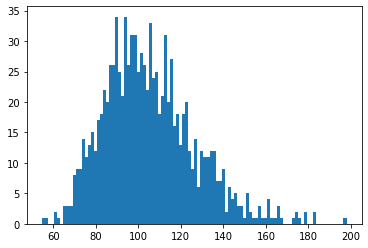

In [31]:
plt.hist(ST,bins = 100)
plt.show()

 ##  방법2 코딩

In [33]:
S0 = 100
mu = 0.05
sigma = 0.2
T = 1
deltaT = 1/365
simul_num = 1000
epsilon = np.random.normal(size = (365, simul_num))
cummulative_sum_epsilon = epsilon.cumsum(axis = 0)
cummulative_sum_deltaT = np.array([deltaT] * 365).cumsum().reshape(-1,1)
St = S0 * np.exp(  (mu - 0.5*sigma**2)*cummulative_sum_deltaT + sigma * np.sqrt(deltaT) * cummulative_sum_epsilon )
pd.DataFrame(St)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,99.175365,100.959586,100.025816,100.415552,99.910628,99.768488,98.675505,99.838007,99.701336,100.997589,...,101.575332,99.886410,99.805659,100.915742,100.056737,100.251769,100.780247,98.613911,99.591544,98.694819
1,97.592859,101.805086,99.310454,99.270765,99.120998,102.045983,98.869520,98.526326,98.744618,101.779149,...,101.521292,98.501049,101.583420,100.974307,100.323948,101.662839,101.028059,100.605282,100.538750,100.301945
2,98.333816,101.602206,98.451408,99.002399,99.558651,101.004916,99.992621,97.493353,100.146295,102.403783,...,101.844634,98.148951,101.574343,101.684527,101.009049,102.258827,101.995702,102.522560,101.484105,100.976471
3,98.648699,102.413455,96.965058,98.076420,100.957102,101.940199,100.692823,98.514755,102.620420,102.270883,...,100.774341,97.851512,102.131587,101.122391,99.401206,101.602260,102.433286,104.248266,102.670765,101.310251
4,98.161861,104.446059,98.940173,98.237885,101.509937,100.968209,100.619661,97.700747,102.585889,100.406815,...,100.499623,96.017249,102.970885,100.978483,99.368270,103.159288,103.482575,105.800582,101.564648,102.366049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,117.633707,123.100598,86.266966,83.976795,87.813844,96.747332,141.989938,121.432464,87.117067,94.944511,...,136.796102,79.548813,90.448847,103.006895,70.930736,142.013578,94.424488,149.308225,113.415706,123.187648
361,118.635436,121.878135,85.947522,83.400359,86.527306,96.022312,140.517381,122.269057,87.905875,94.299718,...,136.811715,78.913295,90.538986,102.432414,70.424931,144.334312,95.709582,150.642654,110.802549,121.946778
362,118.586991,121.604568,86.196897,84.484746,86.473113,96.834407,141.830041,120.583446,89.061870,93.779703,...,137.616394,79.510450,91.843607,102.278933,69.631999,142.994689,96.738966,154.398368,111.126886,119.913333
363,119.430061,122.743756,87.818184,84.936859,87.183028,97.672283,141.123198,120.648926,89.431961,94.651067,...,138.401561,80.097046,93.077522,104.038285,69.488350,145.034951,97.337917,155.864604,110.041541,119.542380


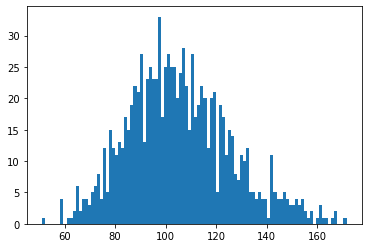

In [34]:
plt.hist(St[-1], bins = 100)
plt.show()

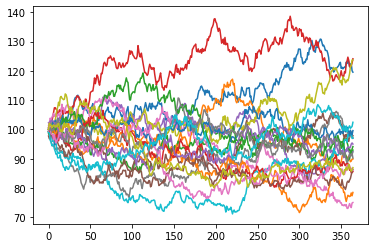

In [41]:
simul_S_df = pd.DataFrame(St)
plt.plot(simul_S_df.sample(n = 20, axis = 1))
plt.show()

 ## Appendix
 
 $$
 W(T) \sim N(0,T) >> \sqrt{T} N(0,1)
 $$
 
 $$
 \lim_{h->0}\frac{W(T+h) - W(T)}{h} = \lim_{h->0} \frac{\sqrt{h}Z}{h} \ \ \ \ [Z \sim N(0,1)] 
 $$
 
 $$
 Z \times  \lim_{h->0} \frac{1}{\sqrt{h}} 
 $$
 극한값 존재안함